### Recognition of traffic signs

In [47]:
import torch
import os

# Paths and directories for the data
current_directory = os.getcwd() 
current_directory = os.path.join(current_directory, '..')
train_images_directory = os.path.join(current_directory, 'train', 'images')
train_labels_directory = os.path.join(current_directory, 'train', 'labels')
valid_images_directory = os.path.join(current_directory, 'valid', 'images')
valid_labels_directory = os.path.join(current_directory, 'valid', 'labels')
test_images_directory = os.path.join(current_directory, 'test', 'images')
test_labels_directory = os.path.join(current_directory, 'test', 'labels')



In [48]:
##Load images and labels
def load_images_and_labels(images_directory, labels_directory):
    images = []
    labels = []

    # Check if directories exist
    if not os.path.exists(images_directory):
        raise FileNotFoundError(f"Image directory does not exist: {images_directory}")
    if not os.path.exists(labels_directory):
        raise FileNotFoundError(f"Label directory does not exist: {labels_directory}")

    # List all files in the images directory
    for image_name in os.listdir(images_directory):
        # Assuming the labels have the same filename as the images
        image_path = os.path.join(images_directory, image_name)

        # change the .jpg to .txt
        image_name = image_name.replace('.jpg', '.txt')
        label_path = os.path.join(labels_directory, image_name)

        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image file not found: {image_path}")
        if not os.path.exists(label_path):
            raise FileNotFoundError(f"Label file not found: {label_path}")

        # Load the image and the corresponding label
        with open(image_path, 'rb') as file:
            image = file.read().splitlines()
            images.append(image)

        # Load the label (YOLOv8 format so keep only the first number)  
        with open(label_path, 'r') as file:
            lines = file.readlines()  # Read all lines 
            for line in lines:
                label = line.split()[0]
                labels.append(int(label))

    return images, labels

train_images, train_labels = load_images_and_labels(train_images_directory, train_labels_directory)
valid_images, valid_labels = load_images_and_labels(valid_images_directory, valid_labels_directory)
test_images, test_labels = load_images_and_labels(test_images_directory, test_labels_directory)

In [49]:
# Find the number of classes
set_of_classes = set(train_labels + valid_labels + test_labels)

print('Number of classes:', len(set_of_classes))
print('Number of training images:', len(train_images))

Number of classes: 264
Number of training images: 1314


<Axes: ylabel='Count'>

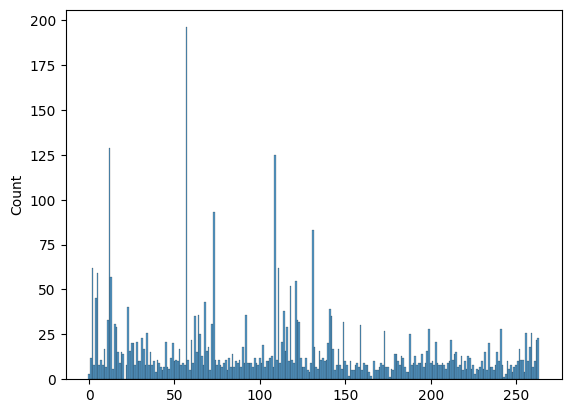

In [53]:
import seaborn as sns

# Plot the distribution of the classes
sns.histplot(train_labels, y=None, bins=264, discrete=True)